In [745]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
%matplotlib inline
from statistics import mode
from collections import Counter
from seaborn import load_dataset
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error




In [746]:
file1 = pd.read_csv('marketing_customer_analysis.csv') 

In [747]:
file1.head(5)

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [748]:
file1.shape

(10910, 26)

In [749]:
def clean_columns(df):
    df.columns=[e.lower().replace(' ','_') for e in df.columns]
    df=df.drop(columns=['unnamed:_0'],axis=1)
    df['effective_to_date']=pd.to_datetime(df['effective_to_date'], errors='coerce')
    df['month'] = df['effective_to_date'].dt.month
    df=df.dropna()
    return df 



In [750]:
file2 = clean_columns(file1)
file2

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
10,HG93801,Arizona,5154.764074,No,Extended,High School or Below,2011-01-02,Employed,M,82730,...,1,Corporate Auto,Corporate L3,Offer2,Branch,442.521087,SUV,Large,A,1
13,KR82385,California,5454.587929,No,Basic,Master,2011-01-26,Employed,M,66334,...,4,Personal Auto,Personal L3,Offer4,Call Center,331.200000,Two-Door Car,Medsize,A,1
16,FH51383,California,5326.677654,No,Basic,High School or Below,2011-02-07,Employed,F,76717,...,6,Personal Auto,Personal L3,Offer4,Call Center,300.528579,Two-Door Car,Large,A,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,PP30874,California,3579.023825,No,Extended,High School or Below,2011-01-24,Employed,F,28304,...,1,Personal Auto,Personal L2,Offer2,Agent,655.200000,Four-Door Car,Medsize,A,1
10903,SU71163,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,59855,...,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A,1
10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,0,...,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A,2
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1


In [751]:
file2.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                 float64
months_since_policy_inception             int64
number_of_open_complaints               float64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [752]:
file2.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
vehicle_type                     0
month                            0
dtype: int64

In [753]:
def graphics1(gf1):
    gf1=sns.countplot(x="response",data=file2)
    gf1=plt.ylabel('Total number of Response')
    gf1=plt.show()
    return gf1

def graphics2(gf2):
    gf2=plt.figure(figsize=(8,4))
    gf2=sns.countplot(x='sales_channel', hue='response', data=file2) 
    gf2=plt.ylabel('Response by Sales Channel')
    gf2=plt.show()
    return gf2

def graphics3(gf3):
    gf3=file2['response_rate'] = np.where(file2.response=='Yes',1,0)
    gf3=file2.groupby('sales_channel')['response_rate'].mean().plot.bar()
    gf3=plt.show()
    return gf3

def tca_bins(x):
    if x <=450:
        return 'Under 450'
    elif x<=900:
        return '450-900'
    elif x<=1350:
        return '900-1350'
    elif x<=1800:
        return '1350-1800'
    else:
        return 'Over 1800'
file2['Total Claim Amount bins']=list(map(tca_bins, file2['total_claim_amount']))
def graphics4(gf4):
    gf4=file2.groupby('Total Claim Amount bins')['response_rate'].mean().plot.bar()
    plt.show()
    return gf4

def tca_bins_incomes(x):
    if x <=20000:
        return 'Under 20K'
    elif x<=40000:
        return '20K-40K'
    elif x<=60000:
        return '40K-60K'
    elif x<=80000:
        return '60K-80K'
    else:
        return 'Over 80K'
file2['Income bins']=list(map(tca_bins_incomes, file2['income']))
def graphics5(gf5):
    gf5=file2.groupby('Income bins')['response_rate'].mean().plot.bar()
    plt.show()
    return gf5

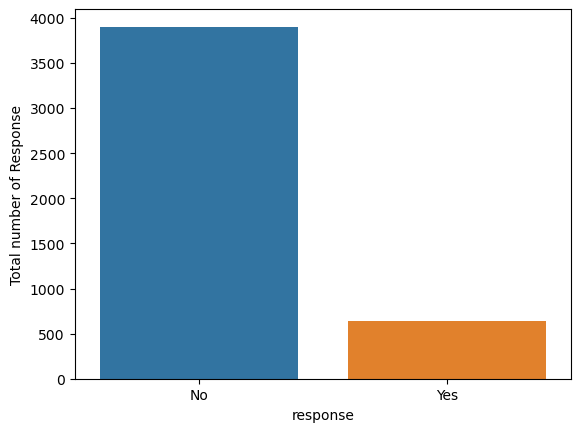

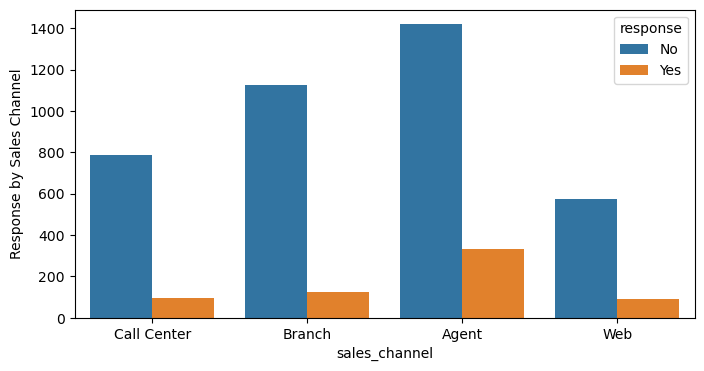

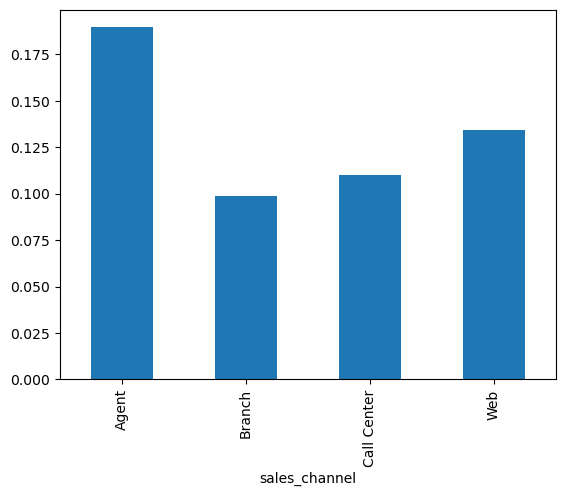

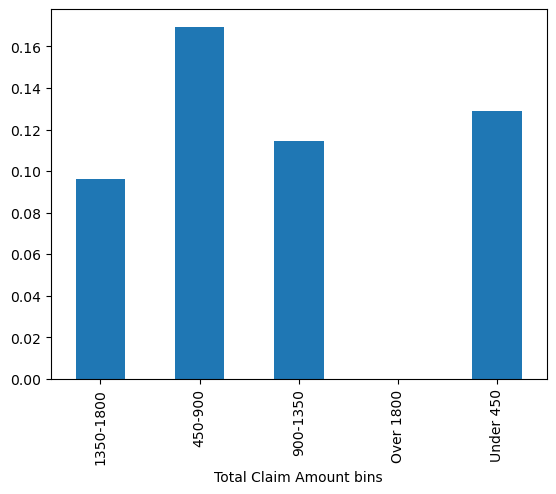

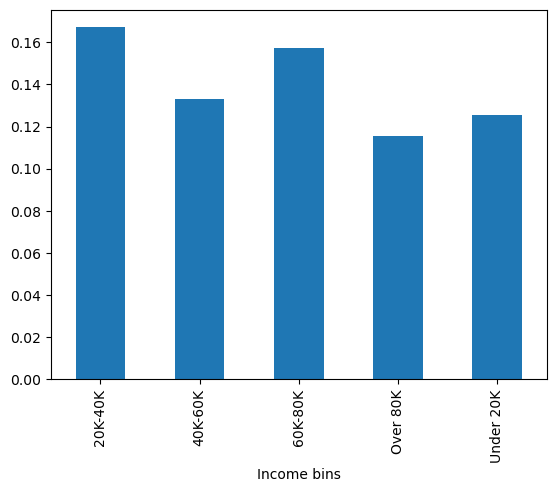

In [754]:
graphics=graphics1(file2),graphics2(file2),graphics3(file2),graphics4(file2),graphics5(file2)

In [755]:
def numerical_graphics1(num_gr1):
    num_gr = numerical = pd.DataFrame(file2.select_dtypes(np.number))
    for i in numerical.columns:
        sns.displot(x=i, data=numerical)
        plt.show()
    return num_gr1
def numerical_graphics2(num_gr2):
    num_gr2 = numerical = pd.DataFrame(file2.select_dtypes(np.number))
    for i in numerical.columns:
        plt.hist(x=file2[i], density = True, bins=30)
        plt.ylabel('Count')
        plt.xlabel(i)
        plt.show()
    return num_gr2

def correlation_graphics(corr_gr):
    corr_gr = correlations_matrix = file2.corr()
    sns.heatmap(correlations_matrix, annot=True)
    plt.show()
    return corr_gr

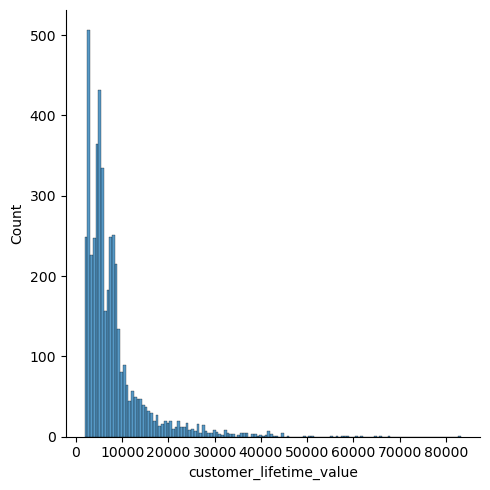

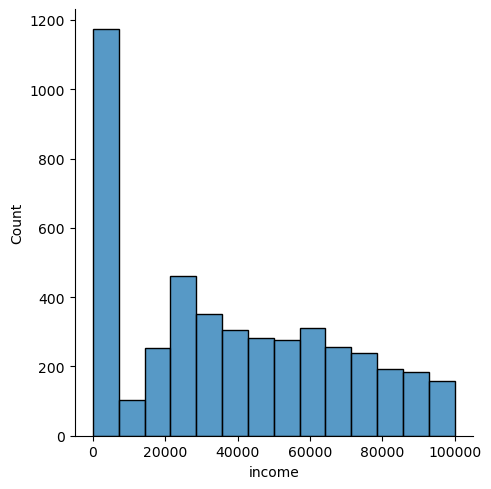

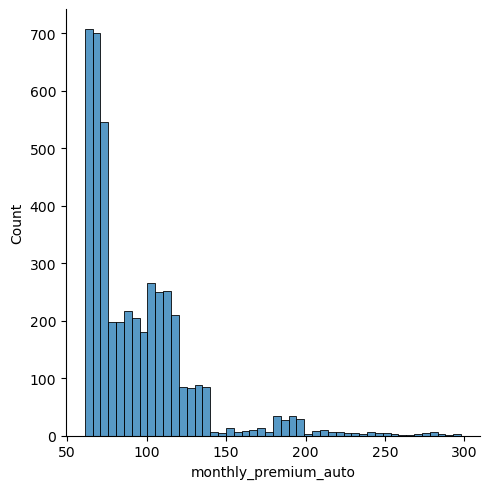

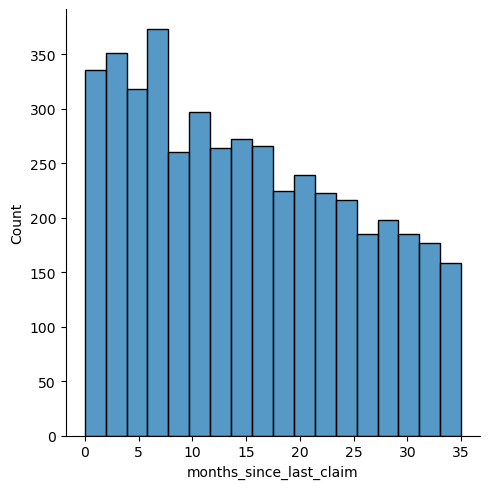

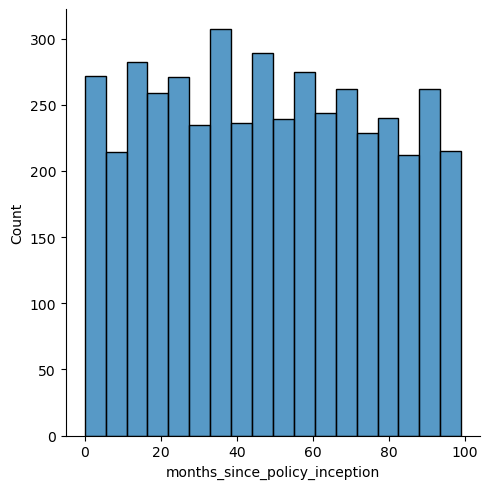

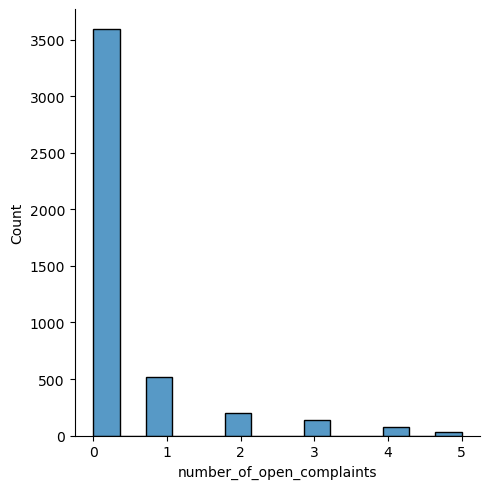

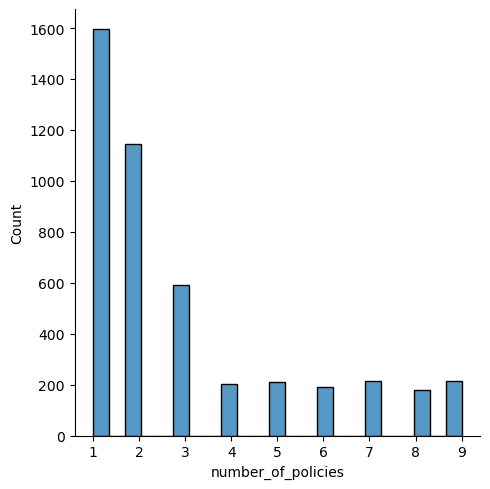

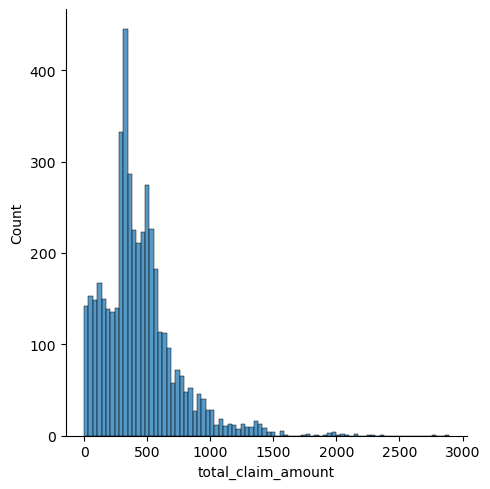

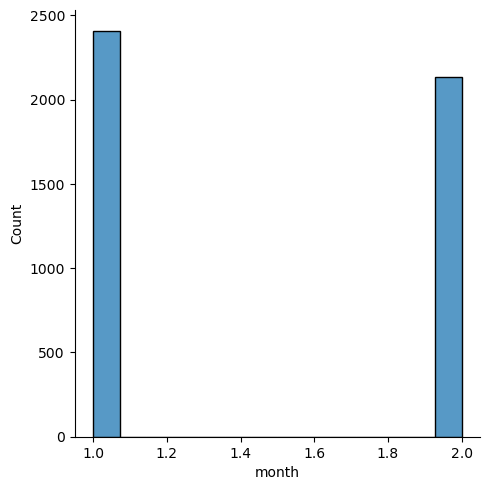

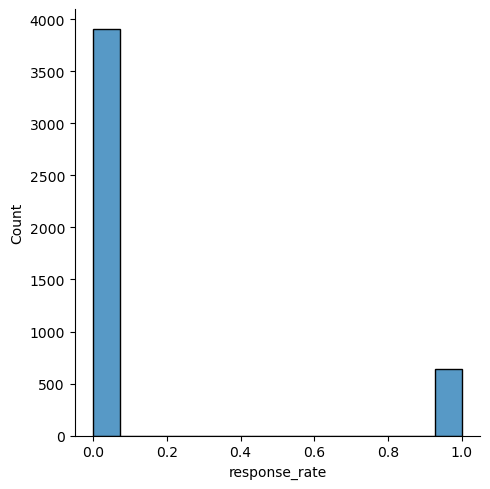

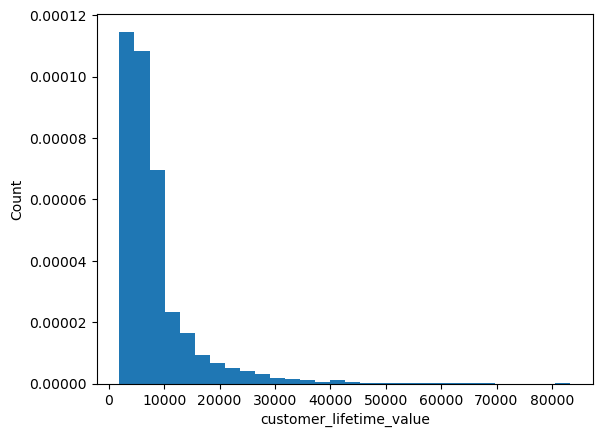

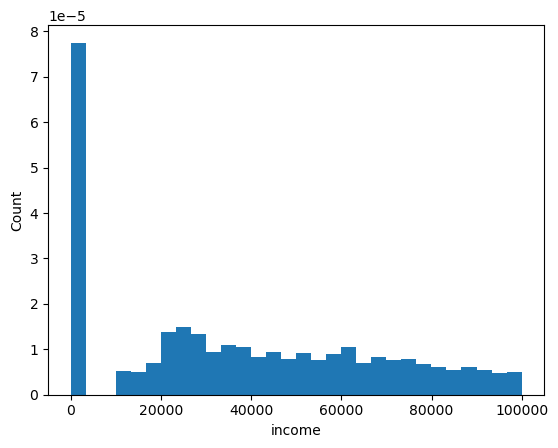

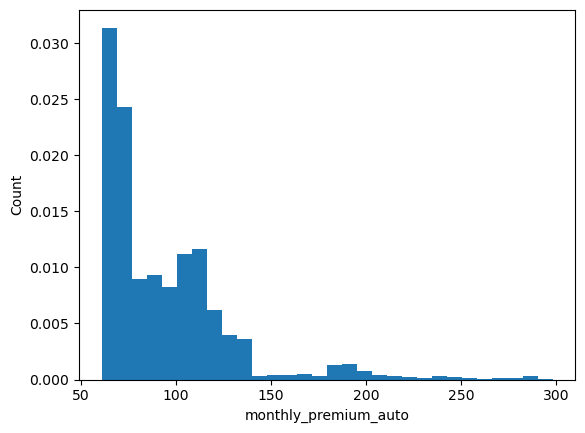

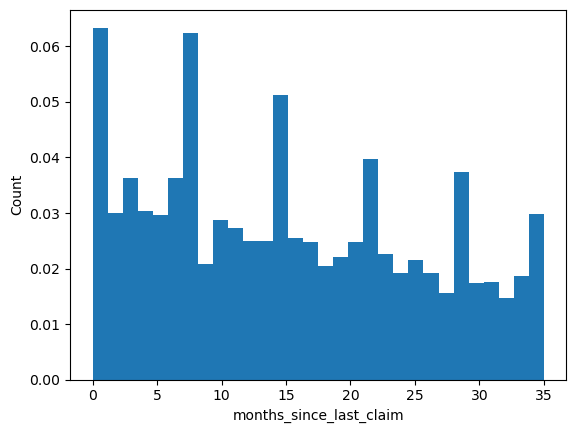

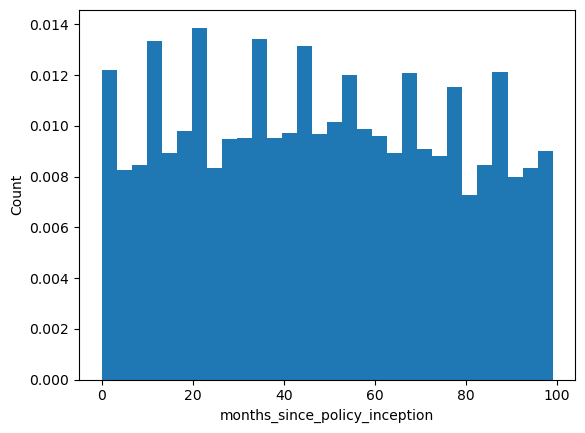

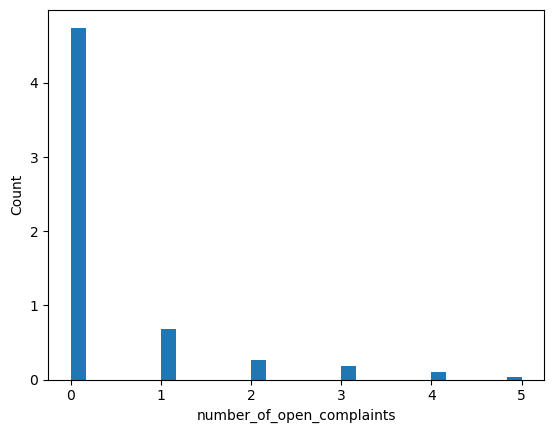

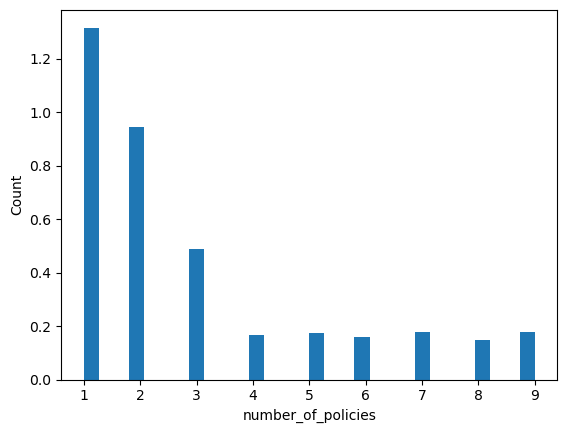

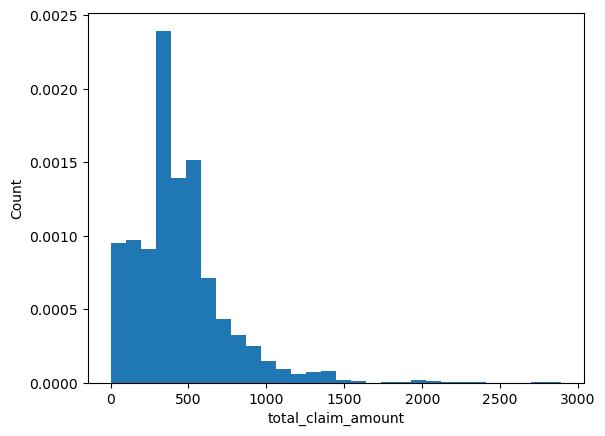

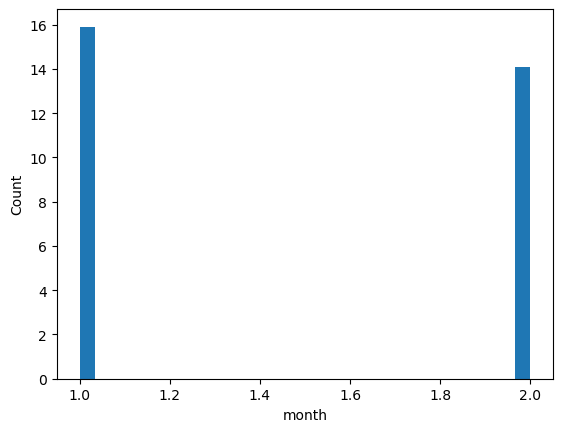

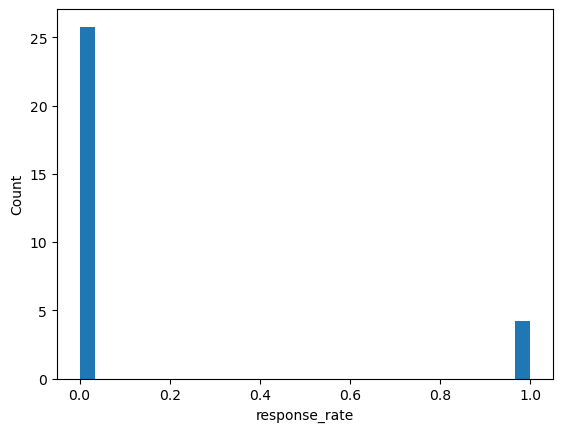

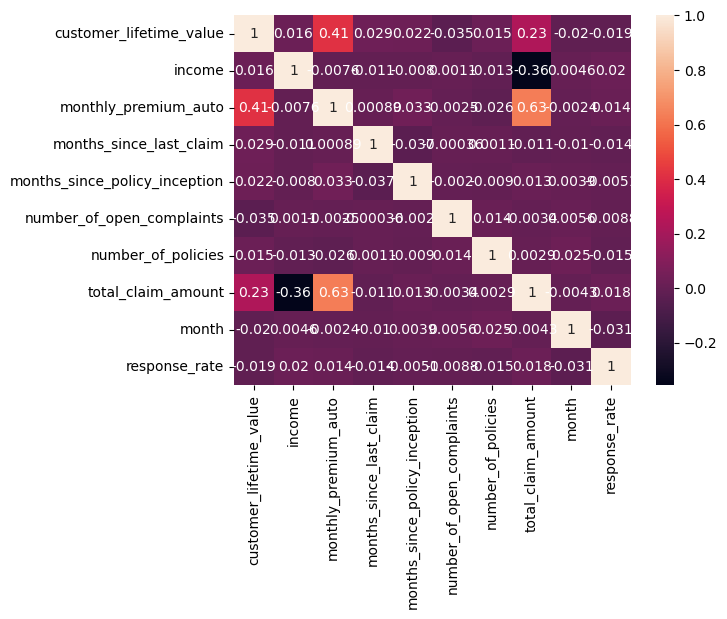

In [756]:
graphics_2=numerical_graphics1(file2),numerical_graphics2(file2),correlation_graphics(file2)

In [757]:
def normalized(norm):
    norm = y = file2['total_claim_amount']
    norm = X = file2.drop(['total_claim_amount'], axis=1)
    norm = X_num = X.select_dtypes(include = np.number)
    norm = X_cat = X.select_dtypes(include = object)
    norm = transformer = MinMaxScaler().fit(X_num)
    norm = x_normalized = transformer.transform(X_num)
    norm = pd.DataFrame(x_normalized, columns=X_num.columns).corr()
    return norm

In [758]:
Normalized = display(normalized(file2))

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month,response_rate
customer_lifetime_value,1.000000,0.015914,0.413739,0.029199,0.022465,-0.034924,0.015397,-0.020217,-0.018783
income,0.015914,1.000000,-0.007594,-0.010556,-0.007987,0.001149,-0.013199,0.004593,0.019743
monthly_premium_auto,0.413739,-0.007594,1.000000,0.000890,0.033422,-0.002469,-0.025578,-0.002390,0.013683
months_since_last_claim,0.029199,-0.010556,0.000890,1.000000,-0.036879,-0.000364,0.001089,-0.010319,-0.013800
months_since_policy_inception,0.022465,-0.007987,0.033422,-0.036879,1.000000,-0.001965,-0.009029,0.003928,-0.005092
number_of_open_complaints,-0.034924,0.001149,-0.002469,-0.000364,-0.001965,1.000000,0.014388,0.005646,-0.008796
number_of_policies,0.015397,-0.013199,-0.025578,0.001089,-0.009029,0.014388,1.000000,0.025147,-0.015159
month,-0.020217,0.004593,-0.002390,-0.010319,0.003928,0.005646,0.025147,1.000000,-0.030532
response_rate,-0.018783,0.019743,0.013683,-0.013800,-0.005092,-0.008796,-0.015159,-0.030532,1.000000


In [759]:
def test(tst):
    tst = y = file2['total_claim_amount']
    tst = X = file2.drop(['total_claim_amount'], axis=1)
    tst = X_cat = X.select_dtypes(include = object)
    tst = X_cat=X_cat.drop(['customer'],axis=1)
    tst = encoder = OneHotEncoder(drop='first').fit(X_cat)
    tst = encoded_for_p = encoder.transform(X_cat).toarray()
    tst = cols = encoder.get_feature_names(input_features=X_cat.columns)
    tst = onehot_encoded_for_p = pd.DataFrame(encoded_for_p, columns=cols)
    tst = File_concat = pd.concat([X.select_dtypes(include = np.number), onehot_encoded_for_p], axis=1)
    tst = X2 = File_concat
    tst = X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    tst = display(y_train.head())
    tst = display(X_train.head())
    return tst

In [776]:
Test = test(file2)

10621     73.919629
7061     279.450351
4570     288.572108
3695     343.340361
5720     264.642948
Name: total_claim_amount, dtype: float64

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type,month,Total Claim Amount bins,Income bins,response_rate
10621,JM93892,Arizona,5953.213546,No,Basic,College,2011-02-02,Employed,M,61006,...,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A,2,Under 450,60K-80K,0
7061,UF28233,Washington,5221.144690,No,Basic,High School or Below,2011-02-03,Employed,F,60445,...,Personal L1,Offer2,Branch,Four-Door Car,Medsize,A,2,Under 450,60K-80K,0
4570,IJ26642,Nevada,5107.163002,Yes,Basic,Bachelor,2011-01-26,Employed,F,35625,...,Personal L3,Offer2,Agent,Four-Door Car,Medsize,A,1,Under 450,20K-40K,1
3695,EK13316,Arizona,5416.413581,No,Basic,Bachelor,2011-02-11,Employed,F,53249,...,Personal L3,Offer2,Web,Four-Door Car,Large,A,2,Under 450,40K-60K,0
5720,RQ22171,California,3961.586180,No,Basic,High School or Below,2011-01-30,Unemployed,F,0,...,Corporate L2,Offer2,Agent,SUV,Medsize,A,1,Under 450,Under 20K,0


In [798]:
def regression(reg):
    reg = y = file2['total_claim_amount']
    reg = X = file2.drop(['total_claim_amount'], axis=1)
    reg = X_cat = X.select_dtypes(include = object)
    reg = X_cat=X_cat.drop(['customer'],axis=1)
    reg = encoder = OneHotEncoder(drop='first').fit(X_cat)
    reg = encoded_for_p = encoder.transform(X_cat).toarray()
    reg = cols = encoder.get_feature_names(input_features=X_cat.columns)
    reg = onehot_encoded_for_p = pd.DataFrame(encoded_for_p, columns=cols)
    reg = File_concat = pd.concat([X.select_dtypes(include = np.number), onehot_encoded_for_p], axis=1)
    reg = X2 = File_concat
    reg = X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    reg = lm = linear_model.LinearRegression().fit(X2,y)
    reg = predictions = lm.predict(X_train)
    reg = predictions_test = lm.predict(X_test)
    reg = mse=mean_squared_error(y_test,predictions_test)
    reg = rmse = np.sqrt(mean_squared_error(y_test,predictions_test))
    reg = mae = mean_absolute_error(y_test, predictions_test)
    reg = print(r2_score(y_train, predictions))
    reg = print(r2_score(y_test, predictions_test))
    reg = print(y_test[:5])
    reg = print(predictions_test[:5])
    reg = print(mse)
    reg = print(rmse)
    reg = print(y_test.mean())
    reg = print(mae)

In [799]:
Regression = regression(file2)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').